# Federal University of Ceará
# Teleinformatics Departament
# Graduate Program in Teleinformatics Engeneering
## TIP8419 - Tensor Algebra
## Homework 1 - Kronecker Product
### Simulation results

- Ezequias Márcio - 497779

To run this notebook properly, it is necessary Python3 installed alongside alongside with the packages listed below:

- `numpy 1.17.2`
- `tensorly 0.4.5`
- `matplotlib 3.1.1`
- `seaborn 0.9.0`
- `tdqm 4.36.1`

Make sure that the file `tensoralg.py` is in the same directory as this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensoralg # Module created for this hw
from tensorly.tenalg import khatri_rao
from time import perf_counter_ns
from tqdm import tqdm, tnrange
sns.set_style("whitegrid")
np.set_printoptions(3, linewidth=175)

In [2]:
# Number of rows/columns:
n = np.array([2,4,8,16,32])#,64])
realiz = 100
# Variables to store the time values:
inv_kron = np.zeros((realiz, n.size))
kron_inv = np.zeros((realiz, n.size))
n_inv_kron = np.zeros((realiz, n.size))
n_kron_inv = np.zeros((realiz, n.size))

### Testing functions

In [3]:
def n_kron(mt_list):
    # Calculates the product kron(kron(A, A), A)
    n_kron_prod = mt_list[0]
    for matrix in mt_list[1:]:
        n_kron_prod = tensoralg.kron(n_kron_prod, matrix)
    
    return n_kron_prod

In [4]:
# Matrices for testing:
M, N = 4, 4
A = np.random.rand(M, 2*N).view(np.complex_)

# Nested Kronecker product:
print(f'''Matrix A:
{A}

A \otimes A \otimes A:
{n_kron([A]*3)}

{np.allclose(n_kron([A]*3), tensoralg.kron(tensoralg.kron(A, A), A))}
''')

Matrix A:
[[0.823+0.761j 0.832+0.573j 0.414+0.291j 0.278+0.58j ]
 [0.3  +0.482j 0.991+0.677j 0.26 +0.425j 0.922+0.111j]
 [0.785+0.693j 0.331+0.302j 0.077+0.537j 0.422+0.731j]
 [0.656+0.349j 0.305+0.355j 0.457+0.007j 0.138+0.448j]]

A \otimes A \otimes A:
[[-0.872+1.105e+00j -0.636+1.098e+00j -0.323+5.469e-01j ... -0.401+1.201e-01j -0.201+5.824e-02j -0.26 -6.093e-02j]
 [-0.574+4.224e-01j -0.75 +1.308e+00j -0.507+3.667e-01j ... -0.476+1.444e-01j -0.205-2.649e-02j -0.275+2.690e-01j]
 [-0.791+1.051e+00j -0.346+4.442e-01j -0.665+1.484e-01j ... -0.184+2.838e-02j -0.193-1.148e-01j -0.345-5.355e-02j]
 ...
 [-0.129+2.864e-01j -0.004+6.640e-01j -0.115+2.504e-01j ... -0.264-1.403e-04j -0.1  -4.510e-02j -0.182+9.430e-02j]
 [-0.075+5.743e-01j -0.037+2.453e-01j -0.223+2.010e-01j ... -0.098-1.394e-02j -0.081-8.825e-02j -0.167-8.062e-02j]
 [ 0.042+4.092e-01j -0.068+2.496e-01j  0.138+2.119e-01j ... -0.1  -2.663e-02j -0.084+5.538e-02j -0.081-6.444e-02j]]

True



### Performance simulations - Problem 01 (a)

- Matrix inversion complexity: $\mathcal{O}(n^{3})$
- Number of multiplications in $\big(A\otimes B \big)$: $n^4$

In [22]:
# Mean over 100 realizations:
for r in tnrange(realiz):
    for idx, val in enumerate(n):
        # Generating N x N matrices:
        A = np.random.rand(val, 2*val).view(np.complex_)
        B = np.random.rand(val, 2*val).view(np.complex_)
    
        # Kronecker:
        ti = perf_counter_ns()
        np.linalg.inv(tensoralg.kron(A, B)) # measuring the execution time
        tf = perf_counter_ns()
        inv_kron[r, idx] = tf - ti 
    
        ti = perf_counter_ns()
        tensoralg.kron(np.linalg.inv(A), np.linalg.inv(B)) # measuring the execution time
        tf = perf_counter_ns()
        kron_inv[r, idx] = tf - ti

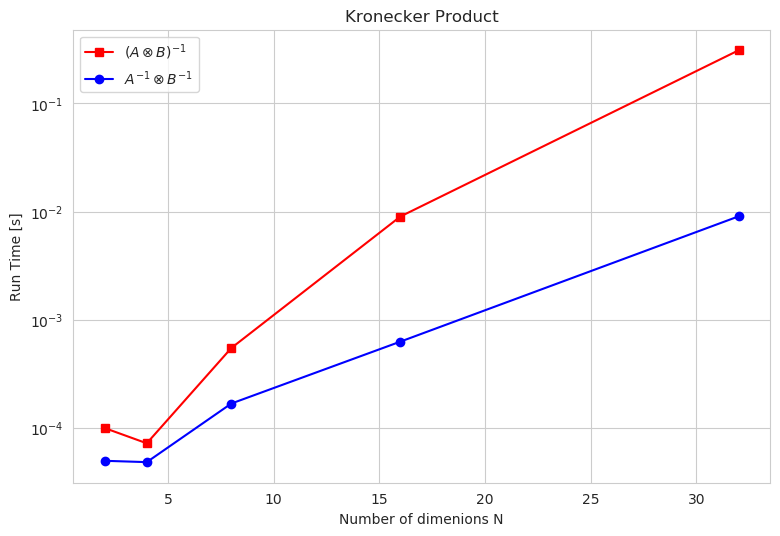

In [24]:
# Plots:
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
ax.semilogy(n, inv_kron.mean(axis=0)*1e-9, '-rs', label='$(A\otimes B)^{-1}$')
ax.semilogy(n, kron_inv.mean(axis=0)*1e-9, '-bo', label='$A^{-1}\otimes B^{-1}$')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Run Time [s]')
ax.set_title('Kronecker Product')
ax.legend()
# plt.savefig('reports/figs/kron.pdf')
plt.show()

### Performance simulations - Problem 01 (b)

- Matrix inversion complexity: $\mathcal{O}(n^{3})$
- Number of multiplications in $\big(A\otimes B \big)$: $n^4$

In [23]:
# Mean over 100 realizations:
nn = [2, 4, 6, 8, 10]
for r in tnrange(realiz):
    for idx, val in enumerate(nn[:3]):
        # Generating N x N matrix:
        A = np.random.rand(4, 4*2).view(np.complex_)
        # Kronecker:
        ti = perf_counter_ns()
        np.linalg.inv(n_kron([A]*val)) # measuring the execution time
        tf = perf_counter_ns()
        n_inv_kron[r, idx] = tf - ti 
    
        ti = perf_counter_ns()
        n_kron([np.linalg.inv(A)]*val) # measuring the execution time
        tf = perf_counter_ns()
        n_kron_inv[r, idx] = tf - ti

KeyboardInterrupt: 

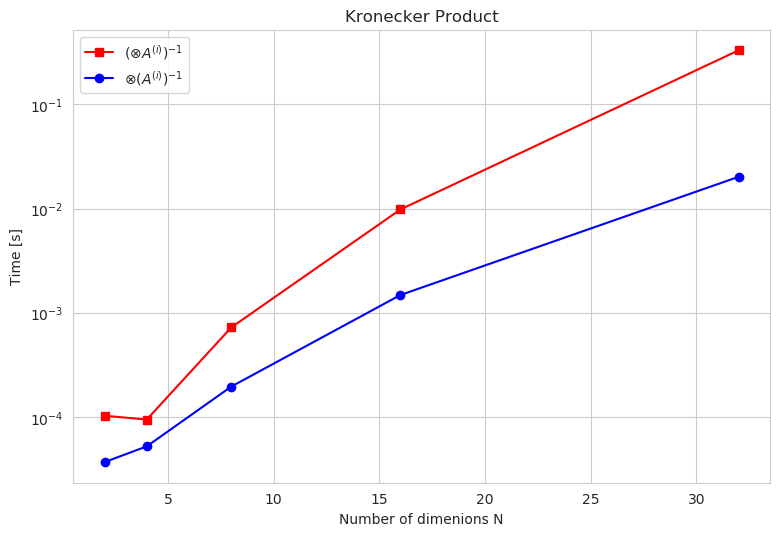

In [21]:
# Plots:
fig, ax = plt.subplots(figsize=(9, 6), dpi=100)
ax.semilogy(n, n_inv_kron.mean(axis=0)*1e-9, '-rs', label='$(\otimes A^{(i)} )^{-1}$')
ax.semilogy(n, n_kron_inv.mean(axis=0)*1e-9, '-bo', label='$\otimes (A^{(i)})^{-1}$')
ax.set_xlabel('Number of dimenions N')
ax.set_ylabel('Time [s]')
ax.set_title('Kronecker Product')
ax.legend()
# plt.savefig('reports/figs/kron.pdf')
plt.show()